# Processos Estocásticos - Trabalho de Simulação

**Alunos:** Matheus Popst e Vitória Guardieiro

In [1]:
import numpy as np
from matplotlib import pyplot as pl

## Exercício 1

In [2]:
from exercicio1 import exercicio1

In [3]:
P = np.matrix([[1/3, 0, 2/3, 0, 0],
              [1/4, 1/2, 1/4, 0, 0],
              [1/2, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 2/3, 1/3]])

In [4]:
L = np.zeros((5, 5))

for i in range(5):
    for j in range(5):
        L[i,j] = exercicio1(P, i+1, j+1, 101, 100)

In [5]:
L

array([[0.37, 0.  , 0.6 , 0.  , 0.  ],
       [0.39, 0.  , 0.49, 0.  , 0.  ],
       [0.41, 0.  , 0.65, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.39, 0.58],
       [0.  , 0.  , 0.  , 0.34, 0.61]])

## Exercício 2

In [6]:
from exercicio2 import exercicio2

In [7]:
P = np.matrix([[1/3, 0, 2/3, 0],
              [1/4, 1/2, 1/4, 0],
              [1/2, 0, 1/2, 0],
              [0, 1/3, 0, 2/3]])

In [8]:
exercicio2(P, 1, 100, 100)

5.32

# Exercício 3

In [9]:
from exercicio3 import martingal

Text(0.5, 1.0, 'Mn')

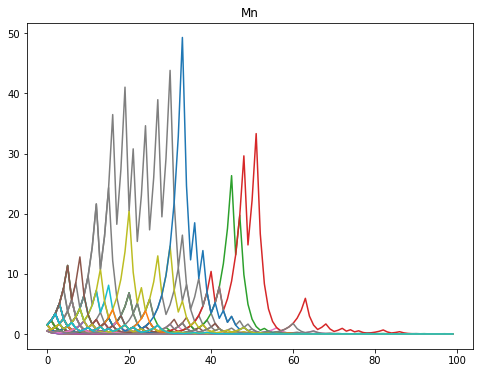

In [10]:
pl.figure(figsize=(8,6))
for i in range(100):
    pl.plot(martingal(100))
pl.title("Mn")

## Exercício 4

In [25]:
from exercicio4 import entre_chegadas, teorema448

In [26]:
entre_chegadas(1, 5)

array([0.64136633, 4.2603373 ])

In [27]:
teorema448(1, 5)

[0,
 0.8737230594491929,
 2.7584575367565787,
 2.998466781584061,
 3.176587741203152,
 4.207825570387568,
 5]

## Exercício 5

In [14]:
from exercicio5 import exercicio5

In [15]:
n, m = 5, 50

In [16]:
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(X)+np.random.normal(loc = 0, scale = 0.001, size = n)
Xn = np.linspace(-np.pi, np.pi, m)

In [17]:
mu, cov = exercicio5(X, Xn, Y, 0.01);

In [18]:
stdv = np.sqrt(np.diag(cov))

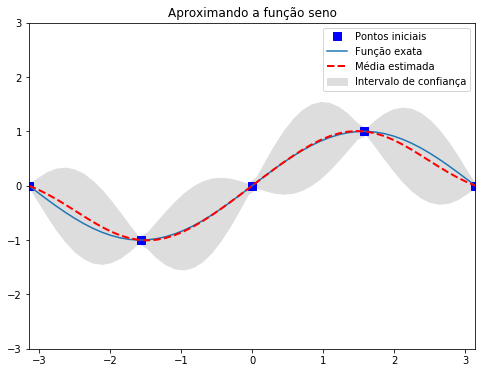

In [19]:
pl.figure(figsize=(8,6))
pl.plot(X, Y, 'bs', ms=8, label="Pontos iniciais")
pl.plot(Xn, np.sin(Xn), label="Função exata")
pl.gca().fill_between(Xn, mu-2*stdv, mu+2*stdv, color="#dddddd", label="Intervalo de confiança")
pl.plot(Xn, mu, 'r--', lw=2, label="Média estimada")
pl.axis([-np.pi, np.pi, -3, 3])
pl.title('Aproximando a função seno')
pl.legend()
pl.show()

## Exercício 6

In [20]:
from exercicio6 import exercicio6

Text(0.5, 1.0, 'Histograma de M1')

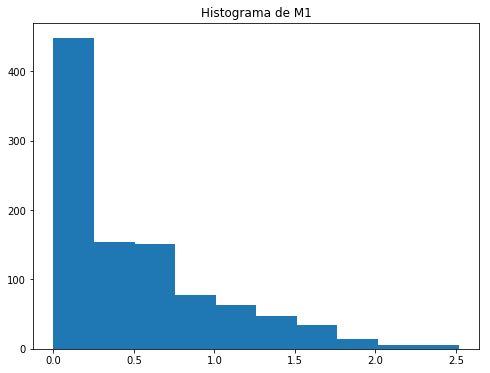

In [21]:
J = 1000
M = []
for j in range(J):
    M.append(exercicio6(5)[1])
pl.figure(figsize=(8,6))
pl.hist(M)
pl.title("Histograma de M1")

## Exercício 7

In [22]:
from exercicio7 import precifica_call

In [23]:
K = [80+5*i for i in range(9)]
C = []
for k in K:
    C.append(precifica_call(100, 0.05, 0.4, 1, k, 1000))

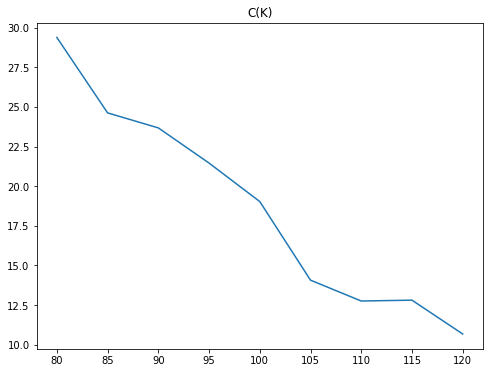

In [24]:
pl.figure(figsize=(8,6))
pl.plot(C)
pl.xticks([i for i in range(9)], K);
pl.title("C(K)");